In [57]:
source("../../BrusselSprouts/scripts/functions.R")
crosses=readLines("~/data/trd/mapped_reads/TRD.vcf.gz.samples")
crosses=crosses[startsWith(crosses, "YJNRC")]
crosses

[1] "YJNRC17" "YJNRC18" "YJNRC2"

In [58]:
i=1

In [59]:
sample=crosses[i]
sample

[1] "YJNRC17"

In [60]:
SameAllele=function(x){
    # bcftools does not let me compare GTs between samples, so here I am finding the few instances where my loci filter does not work (when both are 2/2 I think)
    a1=substr(VCF[x,10],1,1)
    a2=substr(VCF[x,11],1,1)
    
    return(a1==a2)
}

In [61]:
getDP=function(x){
    DP_pos=which(strsplit(VCF[x,9],":",fixed=TRUE)[[1]]=="DP")
    DP1=as.numeric(strsplit(VCF[x,10],":",fixed=TRUE)[[1]][DP_pos])
    DP2=as.numeric(strsplit(VCF[x,11],":",fixed=TRUE)[[1]][DP_pos])
    DP3=as.numeric(strsplit(VCF[x,12],":",fixed=TRUE)[[1]][DP_pos])
    return(data.frame(DP1=DP1,DP2=DP2,DP3=DP3))
}

In [62]:
getAD=function(x){
    AD_pos=which(strsplit(VCF[x,9],":",fixed=TRUE)[[1]]=="AD")
    allele_count=str_count(strsplit(VCF[x,12],":",fixed=TRUE)[[1]][AD_pos], ",")
    AD3_0=as.numeric(strsplit(strsplit(VCF[x,12],":",fixed=TRUE)[[1]][AD_pos], ",", fixed=TRUE)[[1]][1])
    AD3_1=as.numeric(strsplit(strsplit(VCF[x,12],":",fixed=TRUE)[[1]][AD_pos], ",", fixed=TRUE)[[1]][2])
    if(allele_count>1){
        AD3_2=as.numeric(strsplit(strsplit(VCF[x,12],":",fixed=TRUE)[[1]][AD_pos], ",", fixed=TRUE)[[1]][3])
        if(allele_count>2){
            AD3_3=as.numeric(strsplit(strsplit(VCF[x,12],":",fixed=TRUE)[[1]][AD_pos], ",", fixed=TRUE)[[1]][4])
        }else{
            AD3_3=NA
        }
    }else{
        AD3_2=NA
        AD3_3=NA
    }
    return(data.frame(AD3_0=AD3_0,AD3_1=AD3_1,AD3_2=AD3_2,AD3_3=AD3_3))
}

In [63]:
isSNP=function(x){
    Alleles=paste(VCF$REF[x],VCF$ALT[x],sep=",")
    Alleles=strsplit(Alleles, ",", fixed=TRUE)
    return(sum(str_length(Alleles)==1)==length(Alleles))
}

In [40]:
VCF=fread(paste0("~/data/trd/mapped_reads/",sample,".vcf.gz"))
VCF=VCF[!unlist(lapply(1:nrow(VCF), SameAllele)),]
VCF=VCF[unlist(lapply(1:nrow(VCF), isSNP)),]
VCF=bind_cols(VCF, bind_rows(lapply(1:nrow(VCF), getDP)))
VCF=bind_cols(VCF, bind_rows(lapply(1:nrow(VCF), getAD)))
VCF$Allele1=substr(VCF[,10], 1,1)
VCF$Allele2=substr(VCF[,11], 1,1)
head(VCF)
nrow(VCF)

Warning message in fread(paste0("~/data/trd/mapped_reads/", sample, ".vcf.gz")):
"Discarded single-line footer: <<chromosome16	511668	.	A	G	101>>"


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BAN,...,YJNRC2,DP1,DP2,DP3,AD3_0,AD3_1,AD3_2,AD3_3,Allele1,Allele2
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,chromosome1,15358,.,C,T,23940.30,.,AC=3;AF=0.06;AN=6;BaseQRankSum=-0.015;DP=5354;ExcessHet=0;FS=0;InbreedingCoeff=0.5524;MLEAC=14;MLEAF=0.121;MQ=53.58;MQRankSum=2.64;QD=29.59;ReadPosRankSum=0.015;SOR=0.401,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,169:169:99:1|1:15330_C_G:7605,509,0:15330",...,"0|1:3,7:10:99:0|1:15330_C_G:285,0,105:15330",169,270,10,3,7,NA,NA,1,0
2,chromosome1,15364,.,C,G,8043.53,.,AC=3;AF=0.026;AN=6;BaseQRankSum=-0.238;DP=5297;ExcessHet=0;FS=0;InbreedingCoeff=0.5229;MLEAC=6;MLEAF=0.052;MQ=48.21;MQRankSum=2.74;QD=26.34;ReadPosRankSum=-0.799;SOR=0.507,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,172:172:99:1|1:15330_C_G:7740,518,0:15330",...,"0|1:3,8:11:99:0|1:15330_C_G:327,0,102:15330",172,270,11,3,8,NA,NA,1,0
3,chromosome1,15377,.,A,G,7869.88,.,AC=3;AF=0.026;AN=6;BaseQRankSum=0.682;DP=5305;ExcessHet=0;FS=0;InbreedingCoeff=0.517;MLEAC=6;MLEAF=0.052;MQ=49.04;MQRankSum=3.22;QD=32.11;ReadPosRankSum=-0.543;SOR=0.541,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,172:172:99:1|1:15330_C_G:7615,518,0:15330",...,"0|1:5,7:12:99:0|1:15330_C_G:279,0,148:15330",172,270,12,5,7,NA,NA,1,0
4,chromosome1,15388,.,G,A,6621.88,.,AC=3;AF=0.026;AN=6;BaseQRankSum=0.15;DP=5308;ExcessHet=0;FS=0;InbreedingCoeff=0.517;MLEAC=6;MLEAF=0.052;MQ=48.54;MQRankSum=3.36;QD=27;ReadPosRankSum=-0.86;SOR=0.488,GT:AD:DP:GQ:PL,"1/1:0,169:169:99:6459,506,0",...,"0/1:5,8:13:99:187,0,119",169,270,13,5,8,NA,NA,1,0
5,chromosome1,27261,.,T,"C,A",23939.10,.,"AC=0,3;AF=0.017,0.043;AN=6;BaseQRankSum=0.916;DP=15082;ExcessHet=0;FS=0;InbreedingCoeff=0.7691;MLEAC=2,5;MLEAF=0.017,0.043;MQ=58.04;MQRankSum=1.42;QD=29.87;ReadPosRankSum=1.51;SOR=0.598",GT:AD:DP:GQ:PL,"2/2:0,0,221:221:99:8727,8727,8727,663,663,0",...,"0/2:10,0,6:16:99:156,187,480,0,293,275",221,303,16,10,0,6,NA,2,0
6,chromosome1,27318,.,T,C,173149.00,.,AC=4;AF=0.284;AN=6;BaseQRankSum=-0.881;DP=16561;ExcessHet=0;FS=0;InbreedingCoeff=0.6641;MLEAC=34;MLEAF=0.293;MQ=57.39;MQRankSum=1.44;QD=29.03;ReadPosRankSum=-0.011;SOR=0.637,GT:AD:DP:GQ:PGT:PID:PL:PS,"1/1:0,213:213:99:.:.:8584,640,0:.",...,"1/1:0,10:10:30:.:.:380,30,0:.",213,343,10,0,10,NA,NA,1,0


[1] 39956

In [41]:
VCF$AD_A1=NA
VCF$AD_A2=NA

for(i in 1:nrow(VCF)){
    VCF$AD_A1[i]=VCF[i, paste0("AD3_",VCF$Allele1[i])]
    VCF$AD_A2[i]=VCF[i, paste0("AD3_",VCF$Allele2[i])]
}

head(VCF)

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BAN,...,DP2,DP3,AD3_0,AD3_1,AD3_2,AD3_3,Allele1,Allele2,AD_A1,AD_A2
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,chromosome1,15358,.,C,T,23940.30,.,AC=3;AF=0.06;AN=6;BaseQRankSum=-0.015;DP=5354;ExcessHet=0;FS=0;InbreedingCoeff=0.5524;MLEAC=14;MLEAF=0.121;MQ=53.58;MQRankSum=2.64;QD=29.59;ReadPosRankSum=0.015;SOR=0.401,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,169:169:99:1|1:15330_C_G:7605,509,0:15330",...,270,10,3,7,NA,NA,1,0,7,3
2,chromosome1,15364,.,C,G,8043.53,.,AC=3;AF=0.026;AN=6;BaseQRankSum=-0.238;DP=5297;ExcessHet=0;FS=0;InbreedingCoeff=0.5229;MLEAC=6;MLEAF=0.052;MQ=48.21;MQRankSum=2.74;QD=26.34;ReadPosRankSum=-0.799;SOR=0.507,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,172:172:99:1|1:15330_C_G:7740,518,0:15330",...,270,11,3,8,NA,NA,1,0,8,3
3,chromosome1,15377,.,A,G,7869.88,.,AC=3;AF=0.026;AN=6;BaseQRankSum=0.682;DP=5305;ExcessHet=0;FS=0;InbreedingCoeff=0.517;MLEAC=6;MLEAF=0.052;MQ=49.04;MQRankSum=3.22;QD=32.11;ReadPosRankSum=-0.543;SOR=0.541,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,172:172:99:1|1:15330_C_G:7615,518,0:15330",...,270,12,5,7,NA,NA,1,0,7,5
4,chromosome1,15388,.,G,A,6621.88,.,AC=3;AF=0.026;AN=6;BaseQRankSum=0.15;DP=5308;ExcessHet=0;FS=0;InbreedingCoeff=0.517;MLEAC=6;MLEAF=0.052;MQ=48.54;MQRankSum=3.36;QD=27;ReadPosRankSum=-0.86;SOR=0.488,GT:AD:DP:GQ:PL,"1/1:0,169:169:99:6459,506,0",...,270,13,5,8,NA,NA,1,0,8,5
5,chromosome1,27261,.,T,"C,A",23939.10,.,"AC=0,3;AF=0.017,0.043;AN=6;BaseQRankSum=0.916;DP=15082;ExcessHet=0;FS=0;InbreedingCoeff=0.7691;MLEAC=2,5;MLEAF=0.017,0.043;MQ=58.04;MQRankSum=1.42;QD=29.87;ReadPosRankSum=1.51;SOR=0.598",GT:AD:DP:GQ:PL,"2/2:0,0,221:221:99:8727,8727,8727,663,663,0",...,303,16,10,0,6,NA,2,0,6,10
6,chromosome1,27318,.,T,C,173149.00,.,AC=4;AF=0.284;AN=6;BaseQRankSum=-0.881;DP=16561;ExcessHet=0;FS=0;InbreedingCoeff=0.6641;MLEAC=34;MLEAF=0.293;MQ=57.39;MQRankSum=1.44;QD=29.03;ReadPosRankSum=-0.011;SOR=0.637,GT:AD:DP:GQ:PGT:PID:PL:PS,"1/1:0,213:213:99:.:.:8584,640,0:.",...,343,10,0,10,NA,NA,1,0,10,0


In [44]:
summary(VCF$AD_A1-VCF$AD_A2)

chrs=summarise(group_by(VCF, `#CHROM`),maxPos=max(POS))

VCF$global_pos=VCF$POS
for(c in 2:length(unique(VCF$`#CHROM`))){
    chr=unique(VCF$`#CHROM`)[c]
    VCF$global_pos[VCF$`#CHROM`==chr]=VCF$POS[VCF$`#CHROM`==chr]+sum(chrs$maxPos[chrs$`#CHROM`%in%unique(VCF$`#CHROM`)[1:(c-1)]])
}
head(VCF)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-168.000    0.000    6.000    6.315   13.000 1020.000 

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BAN,...,DP3,AD3_0,AD3_1,AD3_2,AD3_3,Allele1,Allele2,AD_A1,AD_A2,global_pos
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>
1,chromosome1,15358,.,C,T,23940.30,.,AC=3;AF=0.06;AN=6;BaseQRankSum=-0.015;DP=5354;ExcessHet=0;FS=0;InbreedingCoeff=0.5524;MLEAC=14;MLEAF=0.121;MQ=53.58;MQRankSum=2.64;QD=29.59;ReadPosRankSum=0.015;SOR=0.401,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,169:169:99:1|1:15330_C_G:7605,509,0:15330",...,10,3,7,NA,NA,1,0,7,3,15358
2,chromosome1,15364,.,C,G,8043.53,.,AC=3;AF=0.026;AN=6;BaseQRankSum=-0.238;DP=5297;ExcessHet=0;FS=0;InbreedingCoeff=0.5229;MLEAC=6;MLEAF=0.052;MQ=48.21;MQRankSum=2.74;QD=26.34;ReadPosRankSum=-0.799;SOR=0.507,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,172:172:99:1|1:15330_C_G:7740,518,0:15330",...,11,3,8,NA,NA,1,0,8,3,15364
3,chromosome1,15377,.,A,G,7869.88,.,AC=3;AF=0.026;AN=6;BaseQRankSum=0.682;DP=5305;ExcessHet=0;FS=0;InbreedingCoeff=0.517;MLEAC=6;MLEAF=0.052;MQ=49.04;MQRankSum=3.22;QD=32.11;ReadPosRankSum=-0.543;SOR=0.541,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,172:172:99:1|1:15330_C_G:7615,518,0:15330",...,12,5,7,NA,NA,1,0,7,5,15377
4,chromosome1,15388,.,G,A,6621.88,.,AC=3;AF=0.026;AN=6;BaseQRankSum=0.15;DP=5308;ExcessHet=0;FS=0;InbreedingCoeff=0.517;MLEAC=6;MLEAF=0.052;MQ=48.54;MQRankSum=3.36;QD=27;ReadPosRankSum=-0.86;SOR=0.488,GT:AD:DP:GQ:PL,"1/1:0,169:169:99:6459,506,0",...,13,5,8,NA,NA,1,0,8,5,15388
5,chromosome1,27261,.,T,"C,A",23939.10,.,"AC=0,3;AF=0.017,0.043;AN=6;BaseQRankSum=0.916;DP=15082;ExcessHet=0;FS=0;InbreedingCoeff=0.7691;MLEAC=2,5;MLEAF=0.017,0.043;MQ=58.04;MQRankSum=1.42;QD=29.87;ReadPosRankSum=1.51;SOR=0.598",GT:AD:DP:GQ:PL,"2/2:0,0,221:221:99:8727,8727,8727,663,663,0",...,16,10,0,6,NA,2,0,6,10,27261
6,chromosome1,27318,.,T,C,173149.00,.,AC=4;AF=0.284;AN=6;BaseQRankSum=-0.881;DP=16561;ExcessHet=0;FS=0;InbreedingCoeff=0.6641;MLEAC=34;MLEAF=0.293;MQ=57.39;MQRankSum=1.44;QD=29.03;ReadPosRankSum=-0.011;SOR=0.637,GT:AD:DP:GQ:PGT:PID:PL:PS,"1/1:0,213:213:99:.:.:8584,640,0:.",...,10,0,10,NA,NA,1,0,10,0,27318


In [45]:
chrs$global_pos=cumsum(chrs$maxPos)

In [46]:
VCF$sumCount=VCF$AD_A1+VCF$AD_A2
VCF=subset(VCF, sumCount > 0)
VCF=subset(VCF, sumCount<=quantile(VCF$sumCount, 0.95) & sumCount>=quantile(VCF$sumCount, 0.05))

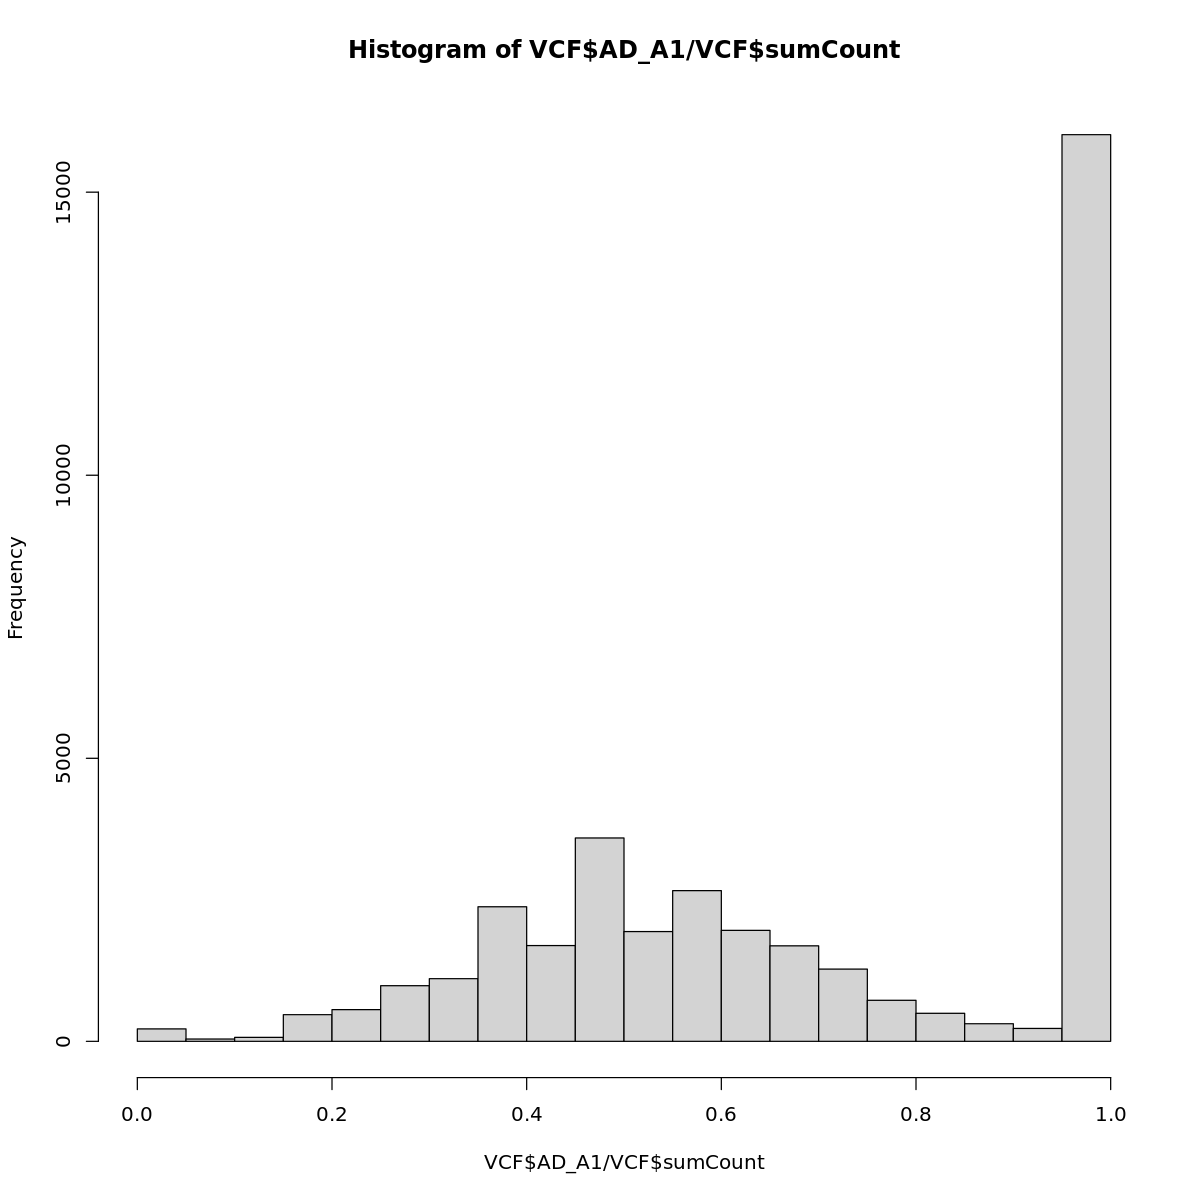

In [48]:
hist(VCF$AD_A1/VCF$sumCount)

In [51]:
sum(VCF$AD_A1==VCF$sumCount) / nrow(VCF)

[1] 0.4167708

In [56]:
sum(VCF$AD_A1!=VCF$sumCount)

[1] 22403

In [50]:
VCF[VCF$AD_A1==VCF$sumCount,c(10:12)]

,BAN,BTI,YJNRC2
,<chr>,<chr>,<chr>
6,"1/1:0,213:213:99:.:.:8584,640,0:.","0/0:343,0:343:99:.:.:0,120,1800:.","1/1:0,10:10:30:.:.:380,30,0:."
10,"0/0:264,0:264:99:.:.:0,120,1800:.","1|1:7,443:450:99:1|1:28290_A_G:19386,1039,0:28290","0/0:13,0:13:39:.:.:0,39,389:."
11,"0/0:264,0,0:264:99:.:.:0,120,1800,120,1800,1800:.","2/2:4,0,424:428:99:.:.:17001,17013,17093,1193,1273,0:.","0/0:13,0,0:13:36:.:.:0,36,540,36,540,540:."
12,"0/0:209,0,0:209:99:.:.:0,120,1800,120,1800,1800:.","1|1:1,393,0:394:99:1|1:28666_A_G:17494,1141,0,17497,1183,17539:28666","0/0:14,0,0:14:42:.:.:0,42,459,42,459,459:."
15,"1|1:0,249,0:249:99:1|1:28926_A_T:10959,749,0,10959,749,10959:28926","0/0:283,0,0:283:99:.:.:0,120,1800,120,1800,1800:.","1/1:0,12,0:12:36:.:.:418,36,0,418,36,418:."
20,"0/0:247,0:247:99:.:.:0,120,1800:.","1/1:0,432:432:99:.:.:17821,1296,0:.","0/0:15,0:15:45:.:.:0,45,400:."
21,"0/0:247,0:247:99:.:.:0,120,1800:.","1|1:4,432:436:99:1|1:31072_C_A:18705,1154,0:31072","0/0:11,0:11:0:.:.:0,0,243:."
22,"0/0:259,0:259:99:0,120,1800","1/1:3,464:467:99:18768,1321,0","0/0:13,0:13:30:0,30,450"
23,"0/0:229,0:229:99:0,120,1800","1/1:2,362:364:99:14247,1011,0","0/0:10,0:10:30:0,30,321"


`geom_smooth()` using formula = 'y ~ x'


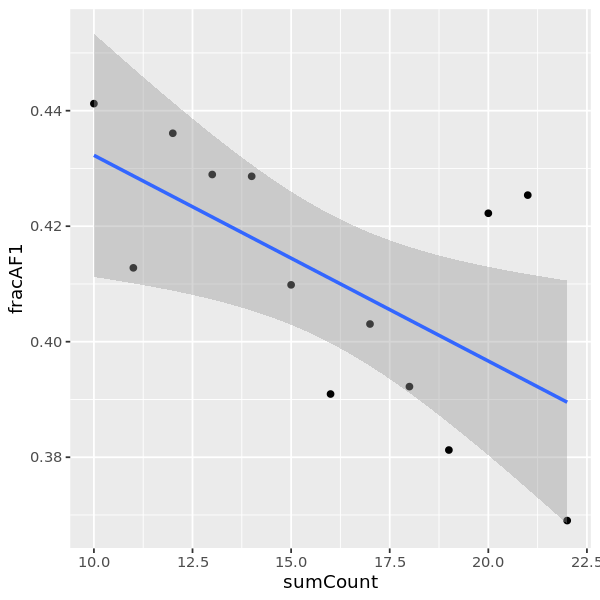

In [52]:
options(repr.plot.width=5, repr.plot.height=5)
data_summary_AF1=summarise(group_by(VCF, sumCount), fracAF1=sum(AD_A1==sumCount)/n())
ggplot(data_summary_AF1, aes(sumCount,fracAF1))+
geom_point()+geom_smooth(method="lm")

In [53]:
mean(VCF$AD_A1/VCF$sumCount)

[1] 0.7190591

In [54]:
summarise(group_by(VCF,`#CHROM`), meanAF=mean(AD_A1/sumCount))

#CHROM,meanAF
<chr>,<dbl>
chromosome1,0.7665266
chromosome10,0.7012444
chromosome11,0.7205357
chromosome12,0.7392939
chromosome13,0.6980096
chromosome14,0.7262701
chromosome15,0.7265951
chromosome16,0.6495220
chromosome2,0.6958431


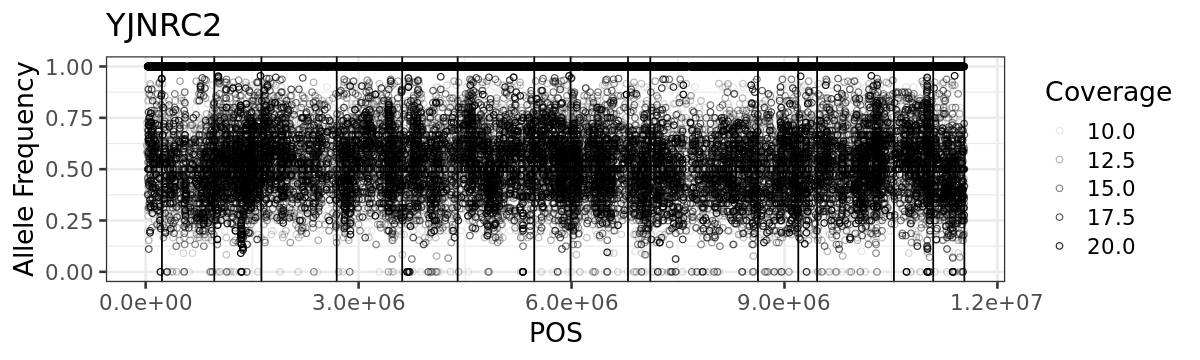

In [55]:
options(repr.plot.width=10, repr.plot.height=3)


print(ggplot(VCF, aes(global_pos, AD_A1/sumCount, alpha=sumCount))+
geom_point(shape=1)+
geom_vline(xintercept = chrs$global_pos)+theme_bw(16)+ylab("Allele Frequency")+xlab("POS")+
ggtitle(sample)+labs(alpha="Coverage"))

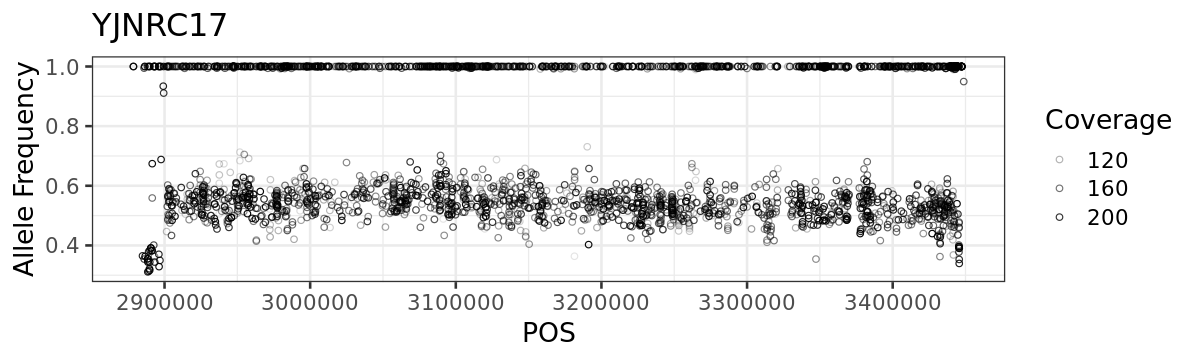

In [225]:
ggplot(subset(data, chr=="chromosome5"), aes(global_pos, countID1/sumCount, alpha=sumCount))+
geom_point(shape=1)+
theme_bw(16)+ylab("Allele Frequency")+xlab("POS")+
ggtitle(sample)+labs(alpha="Coverage")

In [226]:
nrow(subset(data, sumCount>=15 & countID1==sumCount)) / nrow(data)

[1] 0.352593